In [1]:
# set up Python environment: numpy for numerical routines, and matplotlib for plotting
import numpy as np
import matplotlib.pyplot as plt
# display plots in this notebook
%matplotlib inline

# set display defaults
plt.rcParams['figure.figsize'] = (10, 10)        # large images
plt.rcParams['image.interpolation'] = 'nearest'  # don't interpolate: show square pixels
plt.rcParams['image.cmap'] = 'gray'  # use grayscale output rather than a (potentially misleading) color heatmap

# Load caffe

In [2]:
# The caffe module needs to be on the Python path;
#  we'll add it here explicitly.
import sys
caffe_root = '/Volumes/DeepPlanet/SquareBox/deep-planet/caffe-segnet/'  # this file should be run from {caffe_root}/examples (otherwise change this line)
sys.path.insert(0, caffe_root + 'python')

import caffe
# If you get "No module named _caffe", either you have not built pycaffe or you have the wrong path.

# Load net and set up input preprocessing

In [3]:
caffe.set_mode_cpu()
model_def = '/Volumes/DeepPlanet/SquareBox/deep-planet/sanxia_2014/models/inference/deploy.prototxt'

model_weights = '/Volumes/DeepPlanet/SquareBox/deep-planet/sanxia_2014/models/inference/test_weights.caffemodel'

net = caffe.Net(model_def, model_weights, caffe.TEST)

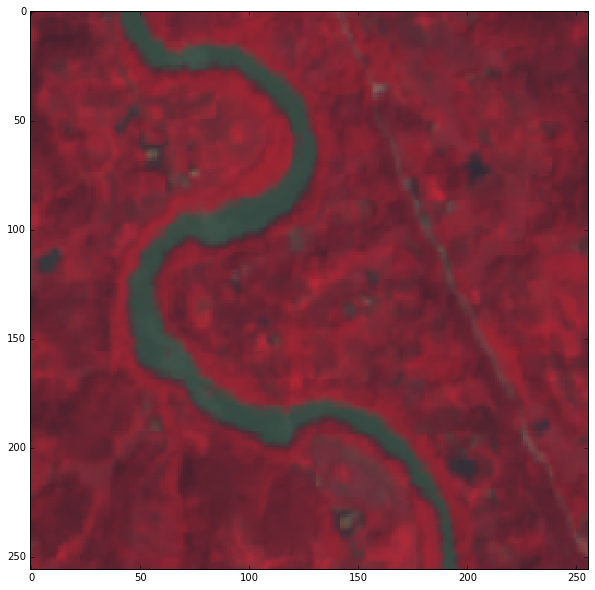

In [6]:
image_file = '/Volumes/DeepPlanet/SquareBox/deep-planet/sanxia_2014/vis/input.png'
image = caffe.io.load_image(image_file)
plt.imshow(image)

In [7]:
# create transformer for the input called 'data'
transformer = caffe.io.Transformer({'data': net.blobs['data'].data.shape})

transformer.set_transpose('data', (2,0,1))  # move image channels to outermost dimension
#transformer.set_mean('data', mu)            # subtract the dataset-mean value in each channel
transformer.set_raw_scale('data', 255)      # rescale from [0, 1] to [0, 255]
transformer.set_channel_swap('data', (2,1,0))  # swap channels from RGB to BGR

In [8]:
transformed_image = transformer.preprocess('data', image)

In [9]:
# copy the image data into the memory allocated for the net
net.blobs['data'].data[...] = transformed_image

### perform classification
output = net.forward()

output_prob = output['prob'][0]  # the output probability vector for the first image in the batch

print 'predicted class is:', output_prob.argmax()

predicted class is: 119905


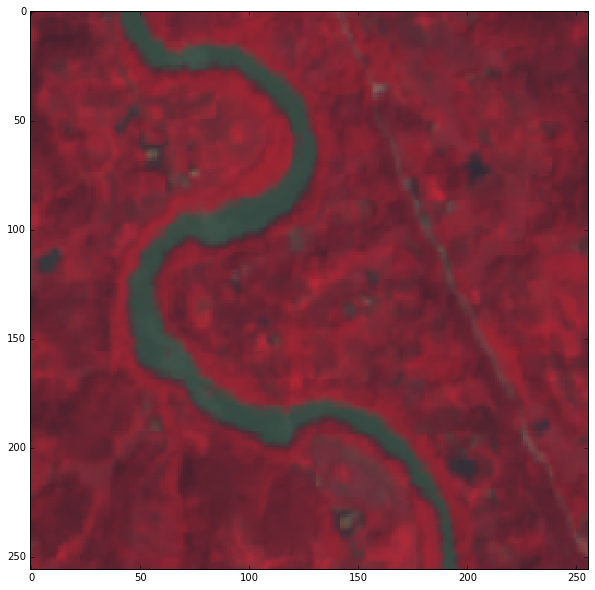

In [10]:
image = net.blobs['data'].data
image = np.squeeze(image[0,:,:,:])

image = image/255.0
image = np.transpose(image, (1,2,0))
image = image[:,:,(2,1,0)]

plt.imshow(image)

In [11]:
label_colours = [
        {"name": "常绿阔叶林", "color": [
                0,
                168,
                132,
                153
            ], "label": 0
        },
        {
        "name": "常绿针叶林", "color": [
                56,
                168,
                0,
                153
            ], "label": 1
        },
        {
        "name": "混交林", "color": [
                0,
                169,
                230,
                153
            ], "label": 2
        },
        {
        "name": "落叶阔叶林", "color": [
                0,
                168,
                132,
                153
            ], "label": 3
        },
        {
        "name": "落叶针叶林", "color": [
                56,
                168,
                0,
                153
            ], "label": 4
        },
        {
        "name": "常绿灌木林", "color": [
                85,
                255,
                0,
                153
            ], "label": 5
        },
        {
        "name": "落叶灌木林", "color": [
                85,
                255,
                0,
                153
            ], "label": 6
        },
        {
        "name": "草地", "color": [
                85,
                255,
                0,
                153
            ], "label": 7
        },
        {
        "name": "城市草本绿地", "color": [
                170,
                255,
                0,
                153
            ], "label": 8
        },
        {
        "name": "旱地", "color": [
                255,
                235,
                175,
                153
            ], "label": 9
        },
        {
        "name": "水田", "color": [
                255,
                255,
                115,
                153
            ], "label": 10
        },
        {
        "name": "灌木种植园", "color": [
                102,
                205,
                171,
                153
            ], "label": 11
        },
        {
        "name": "苗圃", "color": [
                56,
                168,
                0,
                153
            ], "label": 12
        },
        {
        "name": "乔木种植园", "color": [
                115,
                255,
                223,
                153
            ], "label": 13
        },
        {
        "name": "采矿场地", "color": [
                0,
                38,
                115,
                153
            ], "label": 14
        },
        {
        "name": "城市居民地", "color": [
                255,
                0,
                0,
                153
            ], "label": 15
        },
        {
        "name": "城市乔灌混合绿地", "color": [
                85,
                255,
                0,
                153
            ], "label": 16
        },
        {
        "name": "城市乔木绿地", "color": [
                211,
                255,
                190,
                153
            ], "label": 17
        },
        {
        "name": "独立工业和商业用地", "color": [
                76,
                0,
                115,
                153
            ], "label": 18
        },
        {
        "name": "基础设施", "color": [
                255,
                0,
                197,
                153
            ], "label": 19
        },
        {
        "name": "垃圾填埋场", "color": [
                115,
                0,
                0,
                153
            ], "label": 20
        },
        {
        "name": "镇村居民地", "color": [
                115,
                0,
                0,
                153
            ], "label": 21
        },
        {
        "name": "河流季节性水面", "color": [
                190,
                210,
                255,
                153
            ], "label": 22
        },
        {
        "name": "湖泊", "color": [
                0,
                77,
                168,
                153
            ], "label": 23
        },
        {
        "name": "坑塘", "color": [
                0,
                112,
                255,
                153
            ], "label": 24
        },
        {
        "name": "水库", "color": [
                0,
                92,
                230,
                153
            ], "label": 25
        },
        {
        "name": "水库季节性水面", "color": [
                190,
                210,
                255,
                153
            ], "label": 26
        },
        {
        "name": "水生植被", "color": [
                115,
                223,
                255,
                153
            ], "label": 27
        },
        {
        "name": "永久河流水面", "color": [
                0,
                77,
                168,
                153
            ], "label": 28
        },
        {
        "name": "坚硬表面", "color": [
                225,
                225,
                225,
                153
            ], "label": 29
        },
        {
        "name": "松散表面", "color": [
                178,
                178,
                178,
                153
            ], "label": 30
        },
        {
        "name": "未标注", "color": [
                0,
                0,
                0,
                153
            ], "label": 31
        }
    ]

In [12]:
predicted = net.blobs['prob'].data
output = np.squeeze(predicted[0,:,:,:])
ind = np.argmax(output, axis=0)

r = ind.copy()
g = ind.copy()
b = ind.copy()
a = ind.copy()

for l in range(0, len(label_colours)):
    r[ind==l] = label_colours[l]['color'][0]
    g[ind==l] = label_colours[l]['color'][1]
    b[ind==l] = label_colours[l]['color'][2]
    a[ind==l] = label_colours[l]['color'][3]


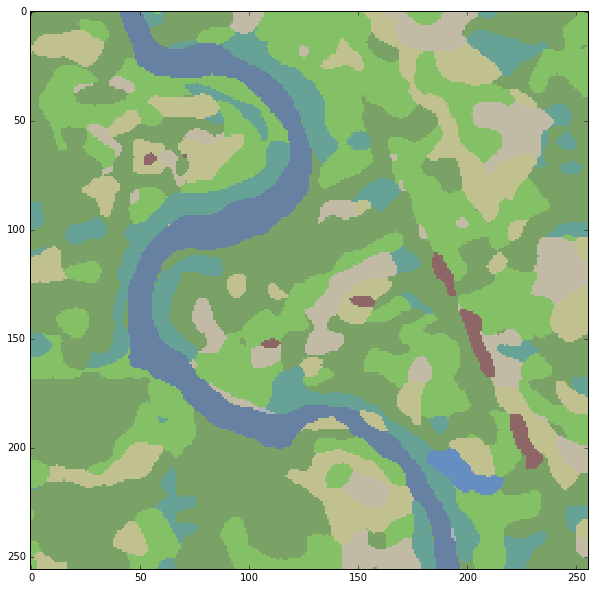

In [13]:
rgba = np.zeros((ind.shape[0], ind.shape[1], 4))
rgba[:,:,0] = r / 255.0
rgba[:,:,1] = g / 255.0
rgba[:,:,2] = b / 255.0
rgba[:,:,3] = a / 255.0

plt.imshow(rgba)

In [14]:
from skimage import io
io.imsave('/Volumes/DeepPlanet/SquareBox/deep-planet/sanxia_2014/predict.png', rgba)

/Users/xuxiang/anaconda/lib/python2.7/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))


In [15]:
# for each layer, show the output shape
for layer_name, blob in net.blobs.iteritems():
    print layer_name + '\t' + str(blob.data.shape)

data	(1, 3, 256, 256)
conv1_1	(1, 64, 256, 256)
conv1_2	(1, 64, 256, 256)
pool1	(1, 64, 128, 128)
pool1_mask	(1, 64, 128, 128)
conv2_1	(1, 128, 128, 128)
conv2_2	(1, 128, 128, 128)
pool2	(1, 128, 64, 64)
pool2_mask	(1, 128, 64, 64)
conv3_1	(1, 256, 64, 64)
conv3_2	(1, 256, 64, 64)
conv3_3	(1, 256, 64, 64)
pool3	(1, 256, 32, 32)
pool3_mask	(1, 256, 32, 32)
conv4_1	(1, 512, 32, 32)
conv4_2	(1, 512, 32, 32)
conv4_3	(1, 512, 32, 32)
pool4	(1, 512, 16, 16)
pool4_mask	(1, 512, 16, 16)
conv5_1	(1, 512, 16, 16)
conv5_2	(1, 512, 16, 16)
conv5_3	(1, 512, 16, 16)
pool5	(1, 512, 8, 8)
pool5_mask	(1, 512, 8, 8)
pool5_D	(1, 512, 16, 16)
conv5_3_D	(1, 512, 16, 16)
conv5_2_D	(1, 512, 16, 16)
conv5_1_D	(1, 512, 16, 16)
pool4_D	(1, 512, 32, 32)
conv4_3_D	(1, 512, 32, 32)
conv4_2_D	(1, 512, 32, 32)
conv4_1_D	(1, 256, 32, 32)
pool3_D	(1, 256, 64, 64)
conv3_3_D	(1, 256, 64, 64)
conv3_2_D	(1, 256, 64, 64)
conv3_1_D	(1, 128, 64, 64)
pool2_D	(1, 128, 128, 128)
conv2_2_D	(1, 128, 128, 128)
conv2_1_D	(1, 64, 12

In [16]:
#Now look at the parameter shapes. The parameters are exposed as another OrderedDict, net.params. 
#We need to index the resulting values with either [0] for weights or [1] for biases.

#The param shapes typically have the form (output_channels, input_channels, filter_height, filter_width) (for the weights)
#and the 1-dimensional shape (output_channels,) (for the biases).

for layer_name, param in net.params.iteritems():
    print layer_name + '\t' + str(param[0].data.shape), str(param[1].data.shape)

conv1_1	(64, 3, 3, 3) (64,)
conv1_1_bn	(1, 64, 1, 1) (1, 64, 1, 1)
conv1_2	(64, 64, 3, 3) (64,)
conv1_2_bn	(1, 64, 1, 1) (1, 64, 1, 1)
conv2_1	(128, 64, 3, 3) (128,)
conv2_1_bn	(1, 128, 1, 1) (1, 128, 1, 1)
conv2_2	(128, 128, 3, 3) (128,)
conv2_2_bn	(1, 128, 1, 1) (1, 128, 1, 1)
conv3_1	(256, 128, 3, 3) (256,)
conv3_1_bn	(1, 256, 1, 1) (1, 256, 1, 1)
conv3_2	(256, 256, 3, 3) (256,)
conv3_2_bn	(1, 256, 1, 1) (1, 256, 1, 1)
conv3_3	(256, 256, 3, 3) (256,)
conv3_3_bn	(1, 256, 1, 1) (1, 256, 1, 1)
conv4_1	(512, 256, 3, 3) (512,)
conv4_1_bn	(1, 512, 1, 1) (1, 512, 1, 1)
conv4_2	(512, 512, 3, 3) (512,)
conv4_2_bn	(1, 512, 1, 1) (1, 512, 1, 1)
conv4_3	(512, 512, 3, 3) (512,)
conv4_3_bn	(1, 512, 1, 1) (1, 512, 1, 1)
conv5_1	(512, 512, 3, 3) (512,)
conv5_1_bn	(1, 512, 1, 1) (1, 512, 1, 1)
conv5_2	(512, 512, 3, 3) (512,)
conv5_2_bn	(1, 512, 1, 1) (1, 512, 1, 1)
conv5_3	(512, 512, 3, 3) (512,)
conv5_3_bn	(1, 512, 1, 1) (1, 512, 1, 1)
conv5_3_D	(512, 512, 3, 3) (512,)
conv5_3_D_bn	(1, 512, 1, 1) (

# Since we're dealing with four-dimensional data here, we'll define a helper function for visualizing sets of rectangular heatmaps.

In [67]:
def vis_square(data, filename):
    """Take an array of shape (n, height, width) or (n, height, width, 3)
       and visualize each (height, width) thing in a grid of size approx. sqrt(n) by sqrt(n)"""
    
    # normalize data for display
    data = (data - data.min()) / (data.max() - data.min())
    
    # force the number of filters to be square
    n = int(np.ceil(np.sqrt(data.shape[0])))
    padding = (((0, n ** 2 - data.shape[0]),
               (0, 1), (0, 1))                 # add some space between filters
               + ((0, 0),) * (data.ndim - 3))  # don't pad the last dimension (if there is one)
    data = np.pad(data, padding, mode='constant', constant_values=1)  # pad with ones (white)
    
    # tile the filters into an image
    data = data.reshape((n, n) + data.shape[1:]).transpose((0, 2, 1, 3) + tuple(range(4, data.ndim + 1)))
    data = data.reshape((n * data.shape[1], n * data.shape[3]) + data.shape[4:])
    
    plt.imshow(data); plt.axis('off')

    io.imsave(filename, data)


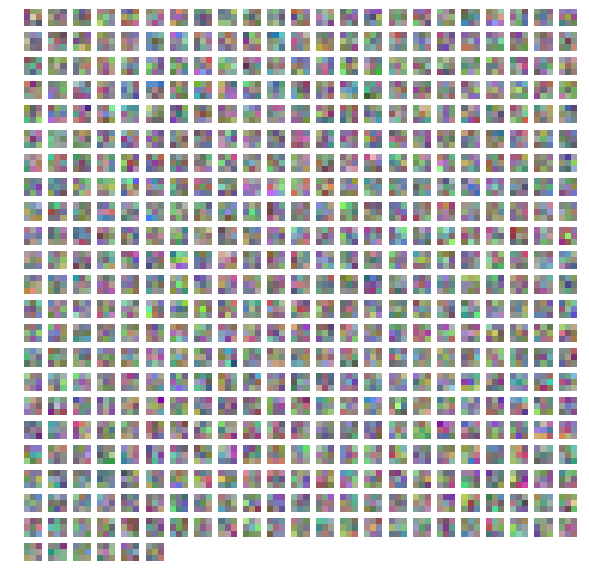

In [93]:
# First we'll look at the first layer filters, conv1
layername = 'conv5_3'
root_dir = '/Volumes/DeepPlanet/SquareBox/deep-planet/sanxia_2014/'
filename = root_dir + layername + '.png'

filters = net.params[layername][0].data
filters = filters.transpose(0, 2, 3, 1)
filters = filters[:,:,:,:3]
#print(filters.shape)

vis_square(filters, filename)

In [39]:
# for each layer, visualize the shape
root_dir = '/Volumes/DeepPlanet/SquareBox/deep-planet/sanxia_2014/visualize/'
for layer_name, blob in net.blobs.iteritems():
    print layer_name + '\t' + str(blob.data.shape)
    # normalize data for display
    layer_data = (blob.data - blob.data.min()) / (blob.data.max() - blob.data.min())
    total_features = layer_data.shape[1]
    if total_features < 10:
        print('continue ...')
        continue
    
    iterms = layer_name.split('_')
    if iterms[0][0] != 'c':
        print('continue ...' + iterms[0])
        continue
        
    step = total_features / 10
    feature_idx = 0
    for i in range(0, 10):
        data = layer_data[0][feature_idx]
        filename = root_dir + layer_name + '_feature' + str(i) + '.png'
        io.imsave(filename, data)
        feature_idx = feature_idx + step

data	(1, 3, 256, 256)
continue ...
conv1_1	(1, 64, 256, 256)
conv1_2	(1, 64, 256, 256)
pool1	(1, 64, 128, 128)
continue ...pool1
pool1_mask	(1, 64, 128, 128)
continue ...pool1
conv2_1	(1, 128, 128, 128)
conv2_2	(1, 128, 128, 128)
pool2	(1, 128, 64, 64)
continue ...pool2
pool2_mask	(1, 128, 64, 64)
continue ...pool2
conv3_1	(1, 256, 64, 64)
conv3_2	(1, 256, 64, 64)
conv3_3	(1, 256, 64, 64)
pool3	(1, 256, 32, 32)
continue ...pool3
pool3_mask	(1, 256, 32, 32)
continue ...pool3
conv4_1	(1, 512, 32, 32)
conv4_2	(1, 512, 32, 32)
conv4_3	(1, 512, 32, 32)
pool4	(1, 512, 16, 16)
continue ...pool4
pool4_mask	(1, 512, 16, 16)
continue ...pool4
conv5_1	(1, 512, 16, 16)
conv5_2	(1, 512, 16, 16)
conv5_3	(1, 512, 16, 16)
pool5	(1, 512, 8, 8)
continue ...pool5
pool5_mask	(1, 512, 8, 8)
continue ...pool5
pool5_D	(1, 512, 16, 16)
continue ...pool5
conv5_3_D	(1, 512, 16, 16)
conv5_2_D	(1, 512, 16, 16)
conv5_1_D	(1, 512, 16, 16)
pool4_D	(1, 512, 32, 32)
continue ...pool4
conv4_3_D	(1, 512, 32, 32)
conv4_2